## A/B - тест (приложение для курьеров)

Представьте, что вы работаете аналитиком в компании по доставке пиццы над приложением для курьеров.

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема — к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности.   

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой.  

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

Описание данных  
order_id - id заказа:  
delivery_time - время доставки в минутах 
district - район доставки  
experiment_group - экспериментальная группа  

Задачи:
1. Посчитайте количество наблюдений в тестовой и контрольной группе.  
2. Визуализируйте распределение наблюдений в разрезе групп и районов.  
3. Проверьте выполнение условий на нормальность и посчитайте стандартное отклонение в тесте и в контроле.
4. Сравните средние в тесте и контроле. 
5. На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 
6. Сделайте вывод, раскатывать ли новую фичу на всех курьеров.

In [1]:
# Импортируем библиотеки

import pandas as pd
import seaborn as sns
from scipy import stats
import scipy
import numpy as np

In [2]:
# Считываем данные

df = pd.read_csv('experiment_lesson_4.csv')
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [3]:
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

### Посчитайте количество наблюдений в тестовой и контрольной группе

In [4]:
df.groupby('experiment_group', as_index = False) \
  .agg({'order_id' : 'count'})

,experiment_group,order_id
0,control,10092
1,test,10104


### Визуализируйте распределение наблюдений в разрезе групп и районов

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

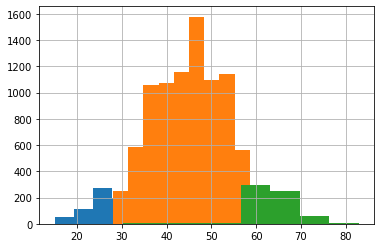

In [5]:
df.query('experiment_group == "control"') \
  .groupby('district') \
  .delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

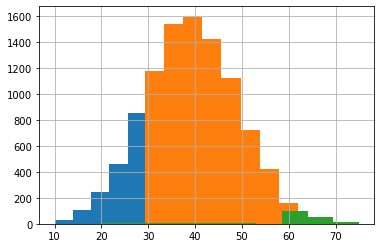

In [6]:
df.query('experiment_group == "test"') \
  .groupby('district') \
  .delivery_time.hist()

### Проверьте выполнение условий на нормальность и посчитайте стандартное отклонение в тесте и в контроле.

Тестовая группа:

H0 - данные распределены нормально  
H1 - данные распределены ненормально

In [7]:
scipy.stats.normaltest(df.query('experiment_group == "test"').delivery_time)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

p value <0.05, отклоняем Ho о нормальном распределении, данные распределены ненормально

In [8]:
np.std(df.query('experiment_group == "test"').delivery_time)

9.882819260031342

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


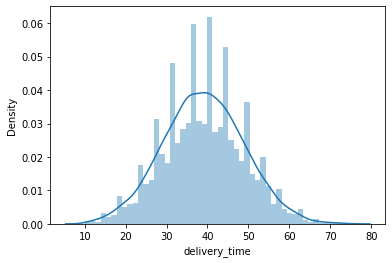

In [9]:
sns.distplot(df.query('experiment_group == "test"').delivery_time)

Контрольная группа:

H0 - данные распределены нормально  
H1 - данные распределены ненормально

In [10]:
scipy.stats.normaltest(df.query('experiment_group == "control"').delivery_time)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

p value > 0.05, принимаем Ho о нормальном распределении, данные распределены нормально

In [11]:
np.std(df.query('experiment_group == "control"').delivery_time)

9.989522000652327

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


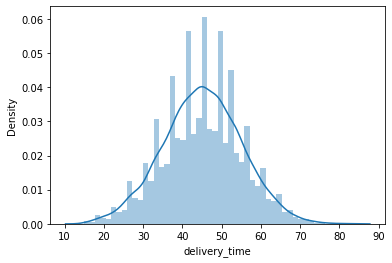

In [12]:
sns.distplot(df.query('experiment_group == "control"').delivery_time)

### Сравните средние в тесте и контроле

In [13]:
mean_test = df.query('experiment_group == "test"').delivery_time.mean()
mean_test

39.04681314330958

In [14]:
mean_control = df.query('experiment_group == "control"').delivery_time.mean()
mean_control

45.065101070154576

Проведем t-тест:  

H0 - среднее время доставки в тесте и контроле равно  
H1 - среднее время доставки в тесте и контроле не равно 

In [15]:
scipy.stats.ttest_ind(df.query('experiment_group == "test"').delivery_time, 
                      df.query('experiment_group == "control"').delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

t-test - p_value < 0.05, отклоняем H0 о равенстве средних, средние статистически значимо различаются

### На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 

In [16]:
(mean_test/mean_control - 1)* 100

-13.354653121660808

### Вывод

Раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось, среднее время доставки в тесте меньше, чем в контроле.